In [ ]:
#"This is a very simple example of neural network. Its purpose is to approximate an unknown single valued function using a dense deep network. \n",
#"The user is invited to play with it, modifying:\n",
#"1. the hidden function\n",
#"2. the number of layers and neurons per layer\n",
#"3. activation functions, number of epochs, and so on."

In [ ]:
from keras.layers import Input,Dense
# Input and dense - dense layer is usually called the linear layer in pytorch
from keras.models import Model
# Model 
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
#\"myhiddenfunction\" is the definition of the function you want to approximate by means of a neural network (NN). 
#The definition is hidden to the NN, who can only access it as a blackbox, to get training samples. \n",
#"This is implemented by means of a generator (a special kind of function), taking in input a number (batchsize) and 
#returning a pair of input output vectors of length batchsize. Each input is a random number in the interval [-pi,pi] and 
#the output is computed by means of myhiddenfunction."

In [ ]:
#the functionality  of the hidden function can be anything you can change it 
def myhidden(x):
  return (np.sin(x)**2+np.cos(x)/3+1)/3

#generator is a function which is going t o be passed to the neural network during the training phase 
# It is going to randomly generate the training sample with the batchhsize 
def generator(batchsize):
  while True:
    inputs=np.random.uniform(low=np.pi,high=np.pi,size=batchsize)
    outputs=np.zeros(batchsize)
    for i in range(0,batchsize):
      outputs[i]=myhidden(inputs[i])
    yield (inputs,outputs)

In [ ]:
print(next(generator(5)))

(array([3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265]), array([0.22222222, 0.22222222, 0.22222222, 0.22222222, 0.22222222]))


In [ ]:
#Input(shape=(1)) This is the input layer 1 
#x we have 20 output layer with the first dense layer 
# Then we have a second dense layer 

myfirstlayer=Dense(20,activation='relu')

input_layer=Input(shape=(1,))
x=myfirstlayer(input_layer)
x=Dense(20,activation='relu')(x)
#20 we specify the number of output neurons 
x=Dense(20,activation='relu')(x)
output_layer=Dense(1,activation='relu')(x)

mymodel=Model(input_layer,output_layer)

In [ ]:
mymodel.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                40        
_________________________________________________________________
dense_5 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_6 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 21        
Total params: 901
Trainable params: 901
Non-trainable params: 0
_________________________________________________________________


In NN not all the parameters are trainable some are not trainable 
Try to be sure you correctly understand the number of learning parameters for each layer.For a dense layer with n inputs and m outputs neurons you have n*m weights +biass.For instance for 20-to 30 layer we have 20*30+30=630 parameters

In [ ]:
mymodel.compile(optimizer='adam',loss='mse')

In [ ]:
batchsize=64
mymodel.fit_generator(generator(batchsize),steps_per_epoch=1000,epochs=10)
#we say we are fitting the model when we have trained the model on a trained set
# https://diamondage.com/2017/06/03/what-does-it-mean-to-fit-a-model-anyway/ 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1000/1000 [==============================] - 2s 2ms/step - loss: 2.7114e-05
Epoch 2/10
1000/1000 [==============================] - 2s 2ms/step - loss: 2.2204e-16
Epoch 3/10
1000/1000 [==============================] - 2s 2ms/step - loss: 2.2204e-16
Epoch 4/10
1000/1000 [==============================] - 2s 2ms/step - loss: 3.6139e-06
Epoch 5/10
1000/1000 [==============================] - 2s 2ms/step - loss: 1.6413e-16
Epoch 6/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0000e+00
Epoch 7/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0000e+00
Epoch 8/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0000e+00
Epoch 9/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0000e+00
Epoch 10/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0000e+00


In [ ]:
#If everything is working correctly the loss should decrease during the training 
# if it doesn't it means for some reason your model is not learning 
# we are finally ready to check the result of the approximation .We plot the hidden function in red and the approximation computed by te netwrk in blue 

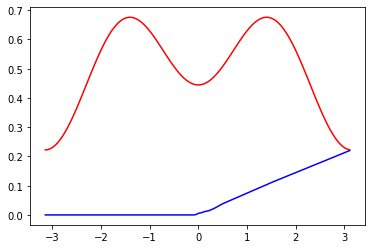

In [ ]:
x=np.arange(-np.pi,np.pi,0.05)
y=[myhidden(a) for a in x]
z=[z[0] for z in mymodel.predict(np.array(x))]
plt.plot(x,y,'r',x,z,'b')
plt.show()